## Project: Student Mental health Data analysis

### 1. Importing Libraries:

Numpy is requried whenever calculations are required (calculating means, medians, sqaure root, etc.).  Pandas is a great module for data processing and data frames.

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### 2. Loading Dataset &amp; Exploratory Data Analysis:


In [ ]:
data = pd.read_csv('Student Mental health.csv')
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)


print('The data has the shape of', data.shape[0], 'Rows and', data.shape[1], 'columns')

print(data.info())
print(data.describe())


The data has the shape of 101 Rows and 11 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Pan

The "head" fucntion displays the first 5 rows of the data frame:

In [ ]:
print(data.head(10))

        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   
5  8/7/2020 12:31               Male  19.0          Engineering   
6  8/7/2020 12:32             Female  23.0     Pendidikan islam   
7  8/7/2020 12:33             Female  18.0                  BCS   
8  8/7/2020 12:35             Female  19.0      Human Resources   
9  8/7/2020 12:39               Male  18.0                Irkhs   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No  

In [ ]:
print(data.tail())

               Timestamp Choose your gender   Age What is your course?  \
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
96                      year 1        3.50 - 4.00             No   
97                      Year 2        3.00 - 3.49             No   
98                      Year 3        3.50 - 4.00            Yes   
99                      year 4        3.50 - 4.00             No   
100                     Year 2        3.00 - 3.49             No   

    Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
96                       No                  Yes                    

### 3. Missing values

In [ ]:
print(data.isnull().sum())

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


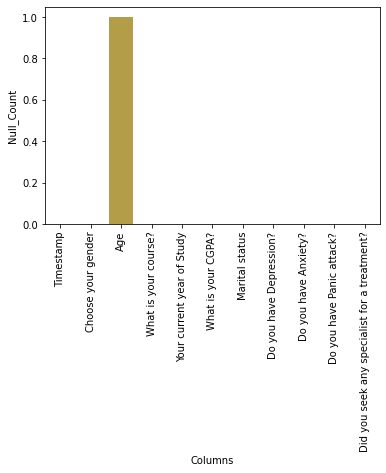

In [ ]:
null = pd.DataFrame(zip(data.columns, data.isnull().sum()), columns=['Columns','Null_Count'])
sns.barplot(x="Columns", y='Null_Count', data=null)
plt.xticks(rotation=90)
plt.show()


We can simply delete rows with missing values, but usually we would 'want to take advantage of as many data points as possible. Replacing missing values with zeros would not be a good idea - as age 0 or price 0 have actual meanings and that would change our data.
Therefore a good replacement value would be something that doesn't affect the data too much, such as the median or mean. the "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column in our case):


In [ ]:
data['Age'] = data['Age'].fillna(np.mean(data['Age']))


In [ ]:
print(data.isnull().sum())

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [ ]:
print(data.columns.unique())

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


In [ ]:
print(data['Choose your gender'].value_counts())

Female    75
Male      26
Name: Choose your gender, dtype: int64


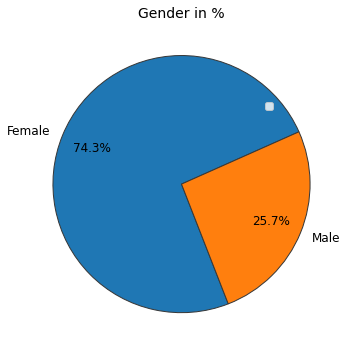

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))


ax.pie(x = data['Choose your gender'].value_counts(), labels =('Female', 'Male'), autopct='%.1f%%', pctdistance=.75, startangle=24,
       textprops={"fontsize":12}, wedgeprops={'edgecolor':'#383838'})

ax.set_title('Gender in %', fontdict={'fontsize':14})
ax.legend([], bbox_to_anchor=(.8, .77))

fig = plt.gcf()

plt.tight_layout()
plt.show()

In [ ]:
print(data['Age'].head())

0    18.0
1    21.0
2    19.0
3    22.0
4    23.0
Name: Age, dtype: float64


In [ ]:
data = data.dropna()
data['Age'] = data['Age'].astype('int64')

In [ ]:
print(data['Age'].head())

0    18
1    21
2    19
3    22
4    23
Name: Age, dtype: int64


<AxesSubplot:title={'center':'Age of Patients'}, xlabel='Age', ylabel='count'>

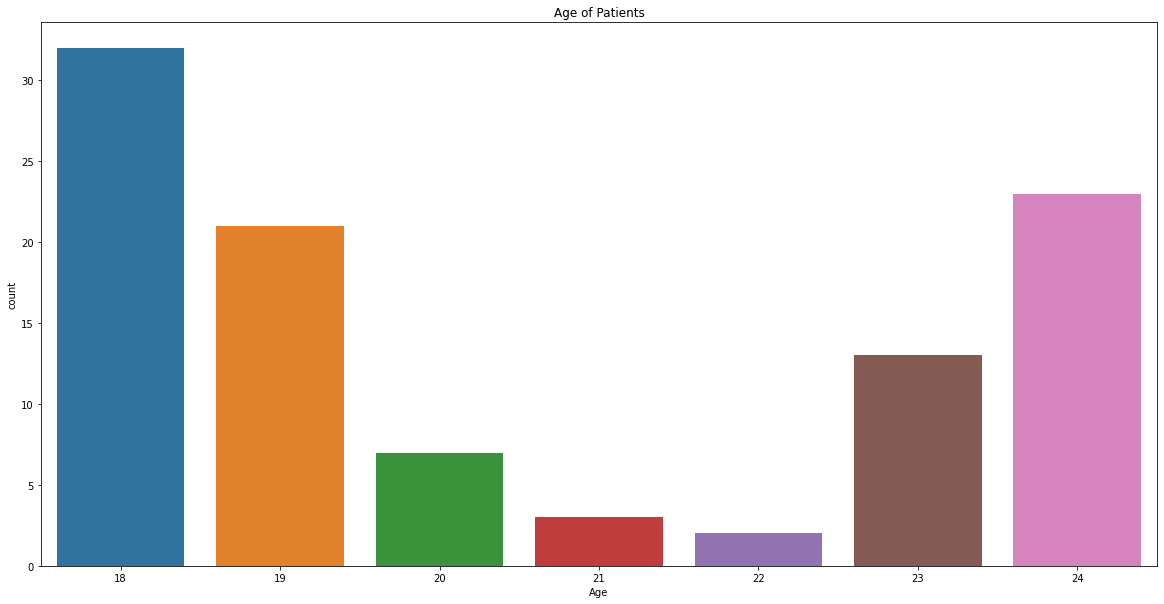

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='Age',data=data)

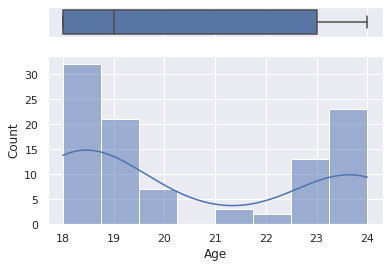

In [ ]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='Age', ax=ax_box)
sns.histplot(data=data, x="Age", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

In [ ]:
print(data.head(10))

        Timestamp Choose your gender  Age What is your course?  \
0  8/7/2020 12:02             Female   18          Engineering   
1  8/7/2020 12:04               Male   21    Islamic education   
2  8/7/2020 12:05               Male   19                  BIT   
3  8/7/2020 12:06             Female   22                 Laws   
4  8/7/2020 12:13               Male   23         Mathemathics   
5  8/7/2020 12:31               Male   19          Engineering   
6  8/7/2020 12:32             Female   23     Pendidikan islam   
7  8/7/2020 12:33             Female   18                  BCS   
8  8/7/2020 12:35             Female   19      Human Resources   
9  8/7/2020 12:39               Male   18                Irkhs   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3        

In [ ]:
print(data['What is your course?'].value_counts())

BCS                        18
Engineering                17
BIT                        10
KOE                         4
Biomedical science          4
psychology                  2
Laws                        2
BENL                        2
Engine                      2
engin                       1
Koe                         1
Pendidikan Islam            1
Pendidikan islam            1
CTS                         1
IT                          1
DIPLOMA TESL                1
Malcom                      1
KIRKHS                      1
Radiography                 1
Communication               1
Pendidikan Islam            1
Banking Studies             1
Kirkhs                      1
Business Administration     1
Diploma Nursing             1
Nursing                     1
Kop                         1
koe                         1
Econs                       1
Psychology                  1
MHSC                        1
Irkhs                       1
Benl                        1
Biotechnol

In [ ]:
ages = data[data["Age"] == 18]
ages

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
9,8/7/2020 12:39,Male,18,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No
12,8/7/2020 12:40,Female,18,BCS,year 1,3.00 - 3.49,No,Yes,No,No,No
14,8/7/2020 12:43,Female,18,KENMS,Year 2,3.50 - 4.00,No,No,Yes,No,No
19,8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,Yes,No
21,8/7/2020 13:13,Female,18,KOE,Year 2,3.00 - 3.49,No,No,No,No,No
25,8/7/2020 13:29,Female,18,Banking Studies,year 1,3.50 - 4.00,No,No,No,No,No
27,8/7/2020 13:41,Male,18,Engineering,Year 2,3.00 - 3.49,Yes,Yes,Yes,No,No
31,8/7/2020 14:29,Male,18,BCS,year 2,3.00 - 3.49,No,No,No,No,No


### Depresion % by the age of 18

In [ ]:
ages['Do you have Depression?'].value_counts()


No     21
Yes    11
Name: Do you have Depression?, dtype: int64

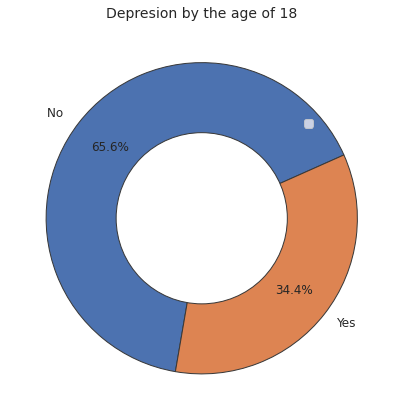

In [ ]:


fig, ax = plt.subplots(figsize=(6, 6))
x = ages['Do you have Depression?'].value_counts()
ax.pie(x, labels = ('No ', 'Yes'), autopct='%.1f%%', pctdistance=.75, startangle=24,
       textprops={"fontsize":12}, wedgeprops={'edgecolor':'#383838'})

ax.set_title('Depresion by the age of 18', fontdict={'fontsize':14})
ax.legend([], bbox_to_anchor=(.8, .77))
centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [ ]:
df = data[data["Do you have Depression?"] == 'Yes']
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
2,8/7/2020 12:05,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
6,8/7/2020 12:32,Female,23,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
11,8/7/2020 12:39,Female,24,Engineering,Year 3,3.50 - 4.00,Yes,Yes,No,No,No
12,8/7/2020 12:40,Female,18,BCS,year 1,3.00 - 3.49,No,Yes,No,No,No
17,8/7/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,Yes,No
19,8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,Yes,No
24,8/7/2020 13:17,Female,23,BCS,Year 3,3.50 - 4.00,No,Yes,Yes,Yes,No
27,8/7/2020 13:41,Male,18,Engineering,Year 2,3.00 - 3.49,Yes,Yes,Yes,No,No


In [ ]:
data["Do you have Depression?"].value_counts()

No     66
Yes    35
Name: Do you have Depression?, dtype: int64

In [ ]:
data['Do you have Anxiety?'].value_counts()

No     67
Yes    34
Name: Do you have Anxiety?, dtype: int64

In [ ]:
data['Do you have Panic attack?'].value_counts()

No     68
Yes    33
Name: Do you have Panic attack?, dtype: int64

In [ ]:
print(data.head(10))

        Timestamp Choose your gender  Age What is your course?  \
0  8/7/2020 12:02             Female   18          Engineering   
1  8/7/2020 12:04               Male   21    Islamic education   
2  8/7/2020 12:05               Male   19                  BIT   
3  8/7/2020 12:06             Female   22                 Laws   
4  8/7/2020 12:13               Male   23         Mathemathics   
5  8/7/2020 12:31               Male   19          Engineering   
6  8/7/2020 12:32             Female   23     Pendidikan islam   
7  8/7/2020 12:33             Female   18                  BCS   
8  8/7/2020 12:35             Female   19      Human Resources   
9  8/7/2020 12:39               Male   18                Irkhs   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3        

In [ ]:
data['Did you seek any specialist for a treatment?'].value_counts()

No     95
Yes     6
Name: Did you seek any specialist for a treatment?, dtype: int64

In [ ]:
print('% of student who seek for treatment', 100*np.mean(data['Did you seek any specialist for a treatment?'] == 'Yes'))
print('% of didnt seek for specialist or treatment', 100*np.mean(data['Did you seek any specialist for a treatment?'] == 'No'))

% of student who seek for treatment 5.9405940594059405
% of didnt seek for specialist or treatment 94.05940594059405


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9b7fa10-ed3f-468d-a98d-7dfbe3f45dfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>